# COVID-19 Data Analysis
- Data is provided Johns Hopkins University <a href='https://github.com/CSSEGISandData/COVID-19'>here</a>

### Import Libraries and Data

In [ ]:
# Import libraries
import shutil
import os
import stat
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from tensorflow import keras
import tensorflow as tf
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from datetime import datetime, timedelta
from tqdm.notebook import tqdm
import tensorflow_addons as tfa

%matplotlib inline

In [ ]:
# Setting up colab directory path
WORKING_DIR = "drive/My Drive/colab/covid-19-analysis"

In [ ]:
# Declare important variables
raw_data_path = f'{WORKING_DIR}/raw_data/'
confirmed_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data_path = raw_data_path + 'csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [ ]:
# Run this cell to get latest data (For local)
# def handle_remove_readonly(func, path, exc):
#     if not os.access(path, os.W_OK):
#         os.chmod(path, stat.S_IWUSR)
#         func(path)
#     else:
#         raise
        
# if(os.path.exists(raw_data_path)):
#     shutil.rmtree(raw_data_path, onerror=handle_remove_readonly)
    
# !git clone https://github.com/CSSEGISandData/COVID-19.git $raw_data_path

In [ ]:
# Run this cell to get latest data (For google colab)
!rm -rf $raw_data_path
!git clone 'https://github.com/CSSEGISandData/COVID-19.git' '$raw_data_path'

Cloning into 'drive/My Drive/colab/covid-19-analysis/raw_data'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 40034 (delta 0), reused 2 (delta 0), pack-reused 40027
Receiving objects: 100% (40034/40034), 294.52 MiB | 35.65 MiB/s, done.
Resolving deltas: 100% (24486/24486), done.
Checking out files: 100% (500/500), done.


## Data Analysis

### Worldwide cases analytic

In [ ]:
# Declare dataframe
df_confirmed = pd.read_csv(confirmed_data_path)
df_death = pd.read_csv(death_data_path)
df_recovered = pd.read_csv(recovered_data_path)

In [ ]:
# Covid cases distribution
map_view = folium.Map(location=[10,0], zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['Country/Region']+"</h5>"+
                    "<div style='text-align:center;'>"+
                      str('-' if type(df_confirmed.iloc[i]['Province/State']) == float else df_confirmed.iloc[i]['Province/State'])+
                    "</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                      "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
                    "</ul>",
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001))))*20000,
        color='#ffaf7a',
        fill_color='#ffaf7a').add_to(map_view)

map_view

In [ ]:
dates = df_confirmed.columns[4:].tolist()

Text(0.5, 0, 'Number of confirmed cases (updated: 7/15/20)')

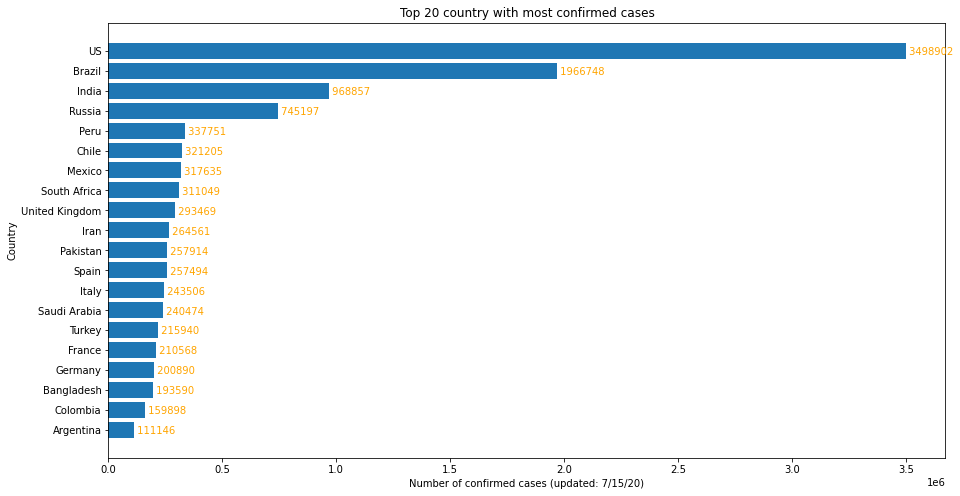

In [ ]:
# Sum the amount of cases in different state group by country
df_confirmed_country = df_confirmed.groupby('Country/Region')[dates].sum().reset_index()
df_confirmed_country = df_confirmed_country.sort_values(by=df_confirmed_country.columns[-1], ascending=False)

# Plot the chart for top 20 most confirmed cases
plt.figure(figsize=(15,8))
plt.barh(df_confirmed_country[df_confirmed_country.columns[0]].iloc[:20][::-1], 
         df_confirmed_country[df_confirmed_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_confirmed_country[df_confirmed_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='orange')
plt.title('Top 20 country with most confirmed cases')
plt.ylabel('Country')
plt.xlabel(f'Number of confirmed cases (updated: {df_confirmed_country.columns[-1]})')

Text(0.5, 0, 'Number of death cases (updated: 7/15/20)')

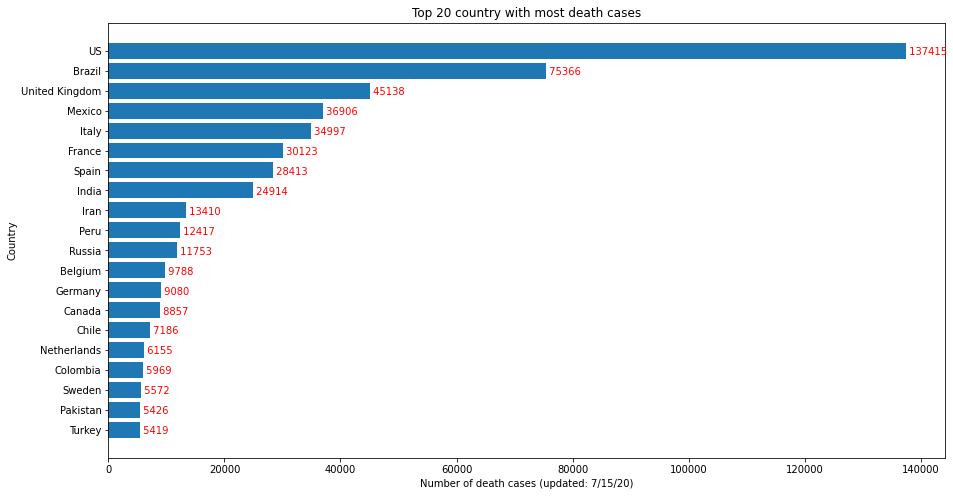

In [ ]:
# Sum the amount of cases in different state group by country
df_death_country = df_death.groupby('Country/Region')[dates].sum().reset_index()
df_death_country = df_death_country.sort_values(by=df_death_country.columns[-1], ascending=False)

# Plot the chart for top 20 most death cases
plt.figure(figsize=(15,8))
plt.barh(df_death_country[df_death_country.columns[0]].iloc[:20][::-1], 
         df_death_country[df_death_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_death_country[df_death_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='red')
plt.title('Top 20 country with most death cases')
plt.ylabel('Country')
plt.xlabel(f'Number of death cases (updated: {df_death_country.columns[-1]})')

Text(0.5, 0, 'Number of recovered cases (updated: 7/15/20)')

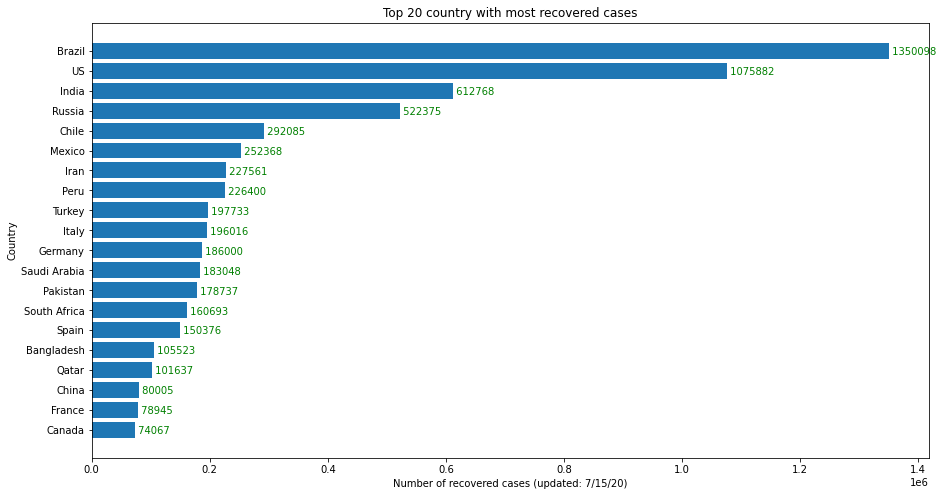

In [ ]:
# Sum the amount of cases in different state group by country
df_recovered_country = df_recovered.groupby('Country/Region')[dates].sum().reset_index()
df_recovered_country = df_recovered_country.sort_values(by=df_recovered_country.columns[-1], ascending=False)

# Plot the chart for top 20 most recovered cases
plt.figure(figsize=(15,8))
plt.barh(df_recovered_country[df_recovered_country.columns[0]].iloc[:20][::-1], 
         df_recovered_country[df_recovered_country.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_recovered_country[df_recovered_country.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='green')
plt.title('Top 20 country with most recovered cases')
plt.ylabel('Country')
plt.xlabel(f'Number of recovered cases (updated: {df_recovered_country.columns[-1]})')

Text(0.5, 0, 'Number of daily confirmed cases')

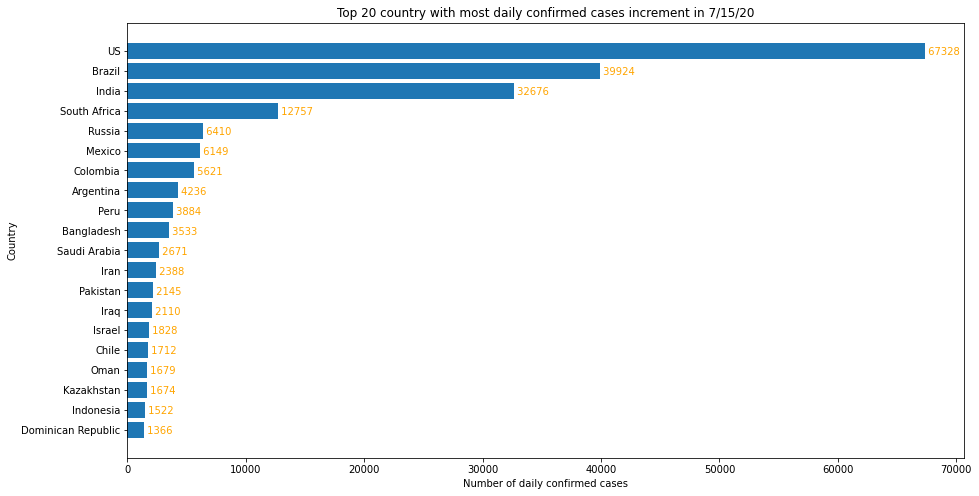

In [ ]:
# Plot the chart for top 20 most daily confirmed cases
plt.figure(figsize=(15,8))
df_confirmed_daily = df_confirmed_country.copy()
daily_date = df_confirmed_daily.columns[-1]
df_confirmed_daily['latest_daily_confirmed'] = (df_confirmed_daily[df_confirmed_daily.columns[-1]]
                                          - df_confirmed_daily[df_confirmed_daily.columns[-2]])
df_confirmed_daily = df_confirmed_daily[['Country/Region', 'latest_daily_confirmed']].sort_values(by=['latest_daily_confirmed'], ascending=False)
plt.barh(df_confirmed_daily[df_confirmed_daily.columns[0]].iloc[:20][::-1], 
         df_confirmed_daily[df_confirmed_daily.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_confirmed_daily[df_confirmed_daily.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='orange')
plt.title(f'Top 20 country with most daily confirmed cases increment in {daily_date}')
plt.ylabel('Country')
plt.xlabel(f'Number of daily confirmed cases')

Text(0.5, 0, 'Number of daily death cases')

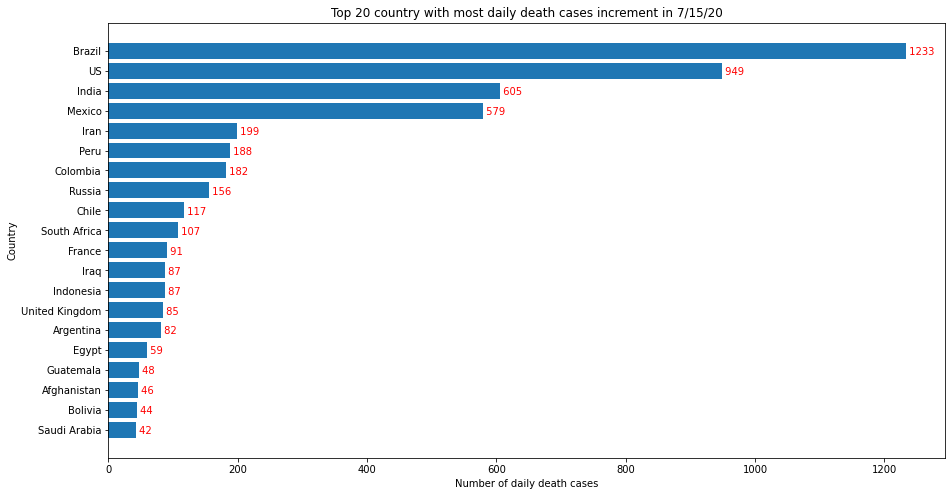

In [ ]:
# Plot the chart for top 20 most daily death cases
plt.figure(figsize=(15,8))
df_death_daily = df_death_country.copy()
daily_date = df_death_daily.columns[-1]
df_death_daily['latest_daily_death'] = (df_death_daily[df_death_daily.columns[-1]]
                                          - df_death_daily[df_death_daily.columns[-2]])
df_death_daily = df_death_daily[['Country/Region', 'latest_daily_death']].sort_values(by=['latest_daily_death'], ascending=False)
plt.barh(df_death_daily[df_death_daily.columns[0]].iloc[:20][::-1], 
         df_death_daily[df_death_daily.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_death_daily[df_death_daily.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='red')
plt.title(f'Top 20 country with most daily death cases increment in {daily_date}')
plt.ylabel('Country')
plt.xlabel(f'Number of daily death cases')

Text(0.5, 0, 'Number of daily recovered cases')

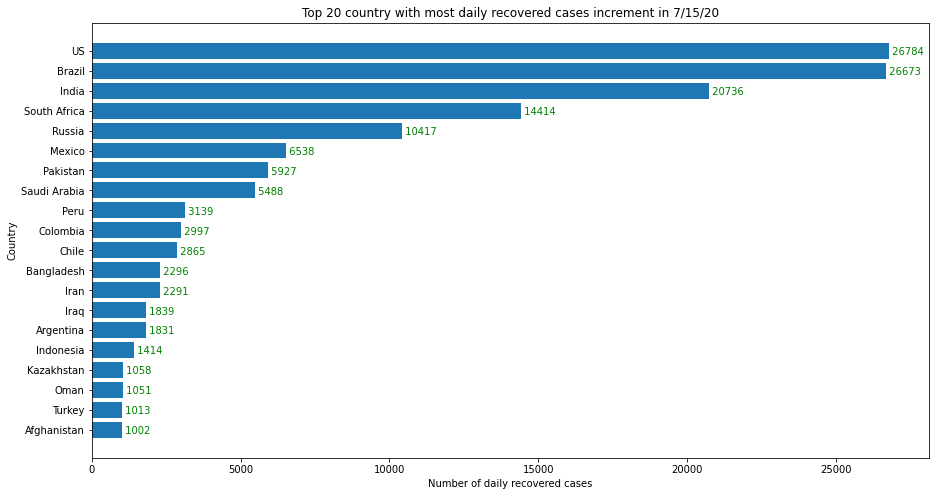

In [ ]:
# Plot the chart for top 20 most daily death cases
plt.figure(figsize=(15,8))
df_recovered_daily = df_recovered_country.copy()
daily_date = df_recovered_daily.columns[-1]
df_recovered_daily['latest_daily_recovered'] = (df_recovered_daily[df_recovered_daily.columns[-1]]
                                          - df_recovered_daily[df_recovered_daily.columns[-2]])
df_recovered_daily = df_recovered_daily[['Country/Region', 'latest_daily_recovered']].sort_values(by=['latest_daily_recovered'], ascending=False)
plt.barh(df_recovered_daily[df_recovered_daily.columns[0]].iloc[:20][::-1], 
         df_recovered_daily[df_recovered_daily.columns[-1]].iloc[:20][::-1])
for i, v in enumerate(df_recovered_daily[df_recovered_daily.columns[-1]].iloc[:20][::-1]):
    plt.text(v, i-.2, ' '+str(v), color='green')
plt.title(f'Top 20 country with most daily recovered cases increment in {daily_date}')
plt.ylabel('Country')
plt.xlabel(f'Number of daily recovered cases')

In [ ]:
# Aggregate the latest number for confirmed, death and recovered cases for each country
df_agg = df_confirmed_country.iloc[:,[0,-1]].rename(columns={'Country/Region':'country',dates[-1]:'confirmed'})
df_agg = df_agg.join(df_death_country.iloc[:,[0,-1]].set_index('Country/Region'), 
                     on='country').rename(columns={dates[-1]:'death'})
df_agg = df_agg.join(df_recovered_country.iloc[:,[0,-1]].set_index('Country/Region'), 
                     on='country').rename(columns={dates[-1]:'recovered'})
df_agg.head(2)

,country,confirmed,death,recovered
174,US,3498902,137415,1075882
23,Brazil,1966748,75366,1350098


In [ ]:
# Calculate the current active cases and rate of death and recovered
df_agg['current_active'] = df_agg['confirmed'] - df_agg['death'] - df_agg['recovered']
df_agg['death_rate'] = round((df_agg['death'] / df_agg['confirmed']) * 100, 2)
df_agg['recovered_rate'] = round((df_agg['recovered'] / df_agg['confirmed']) * 100, 2)
df_agg.head(2)

,country,confirmed,death,recovered,current_active,death_rate,recovered_rate
174,US,3498902,137415,1075882,2285605,3.93,30.75
23,Brazil,1966748,75366,1350098,541284,3.83,68.65


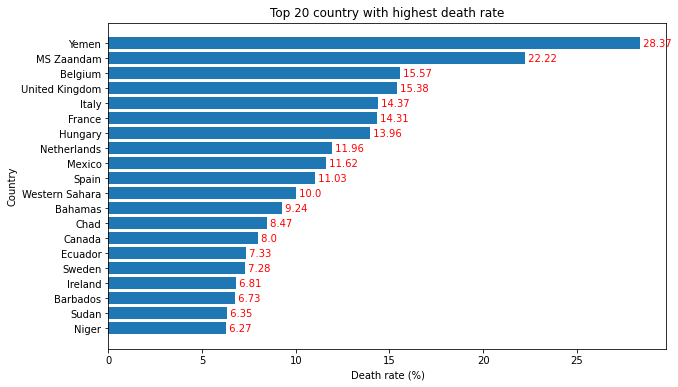

In [ ]:
df_agg.sort_values(by='death_rate', inplace=True)

# Plot top 20 highest death rate
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['death_rate'].iloc[-20:])
plt.title("Top 20 country with highest death rate")
plt.xlabel("Death rate (%)")
plt.ylabel("Country")

for i, v in enumerate(df_agg['death_rate'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='red')

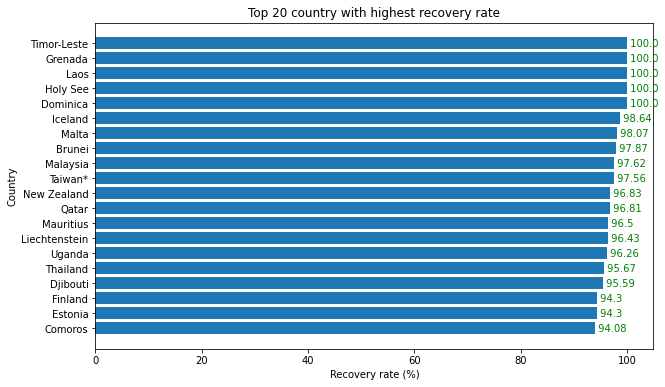

In [ ]:
df_agg.sort_values(by='recovered_rate', inplace=True)

# Plot top 20 highest recovery rate
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['recovered_rate'].iloc[-20:])
plt.title("Top 20 country with highest recovery rate")
plt.xlabel("Recovery rate (%)")
plt.ylabel("Country")

for i, v in enumerate(df_agg['recovered_rate'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='green')

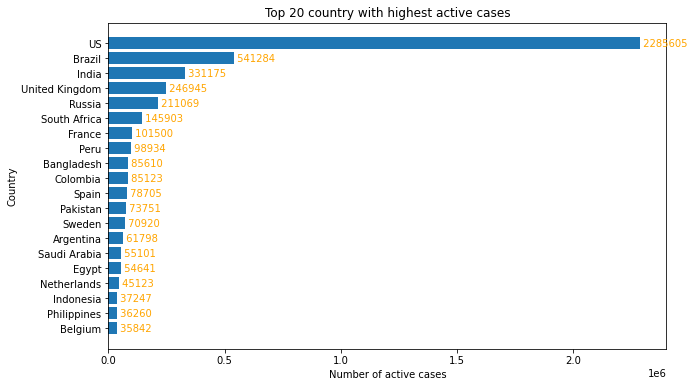

In [ ]:
df_agg.sort_values(by='current_active', inplace=True)

# Plot top 20 highest active case
plt.figure(figsize=(10,6))
plt.barh(df_agg['country'].iloc[-20:], df_agg['current_active'].iloc[-20:])
plt.title("Top 20 country with highest active cases")
plt.xlabel("Number of active cases")
plt.ylabel("Country")

for i, v in enumerate(df_agg['current_active'].iloc[-20:]):
    plt.text(v, i-.2, ' '+str(v), color='orange')

In [ ]:
df_agg.sort_values(by='current_active', ascending=False, inplace=True)
df_agg.style.background_gradient(cmap='Reds')

,country,confirmed,death,recovered,current_active,death_rate,recovered_rate
174,US,3498902,137415,1075882,2285605,3.930000,30.750000
23,Brazil,1966748,75366,1350098,541284,3.830000,68.650000
79,India,968857,24914,612768,331175,2.570000,63.250000
178,United Kingdom,293469,45138,1386,246945,15.380000,0.470000
140,Russia,745197,11753,522375,211069,1.580000,70.100000
156,South Africa,311049,4453,160693,145903,1.430000,51.660000
62,France,210568,30123,78945,101500,14.310000,37.490000
134,Peru,337751,12417,226400,98934,3.680000,67.030000
13,Bangladesh,193590,2457,105523,85610,1.270000,54.510000
37,Colombia,159898,5969,68806,85123,3.730000,43.030000


In [ ]:
my_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'Malaysia'][dates].values.flatten()
type(my_confirmed)

numpy.ndarray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


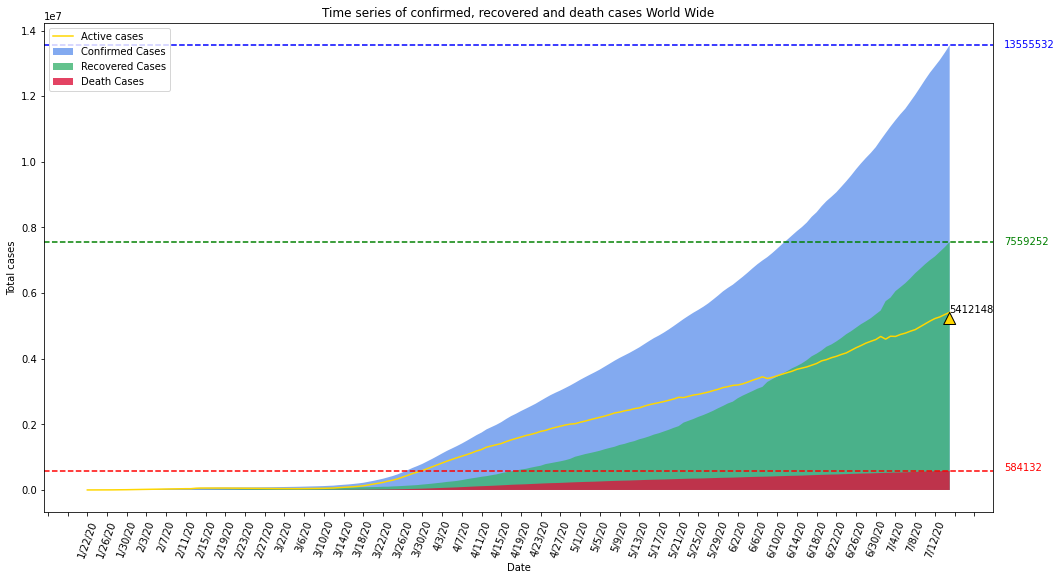

In [ ]:
ww_timeseries_confirmed = np.array(df_confirmed_country.sum().to_numpy()[1:], dtype='Int32')
ww_timeseries_death = np.array(df_death_country.sum().to_numpy()[1:], dtype='Int32')
ww_timeseries_recovered = np.array(df_recovered_country.sum().to_numpy()[1:], dtype='Int32')
ww_timeseries_active = ww_timeseries_confirmed - ww_timeseries_death - ww_timeseries_recovered

# Plot chart of cases in worldwide
plt.figure(figsize=(17,9))

plt.fill_between(dates, ww_timeseries_confirmed, facecolor='cornflowerBlue', alpha=0.8, label='Confirmed Cases')
plt.fill_between(dates, ww_timeseries_recovered, facecolor='mediumSeaGreen', alpha=0.8, label='Recovered Cases')
plt.fill_between(dates, ww_timeseries_death, facecolor='crimson', alpha=0.8, label='Death Cases')
plt.plot(dates, ww_timeseries_active, color='gold', label='Active cases')

plt.axhline(y=ww_timeseries_confirmed[-1], color='blue', linestyle='--')
plt.axhline(y=ww_timeseries_recovered[-1], color='green', linestyle='--')
plt.axhline(y=ww_timeseries_death[-1], color='red', linestyle='--')
plt.text(int(len(dates)* 1.06), ww_timeseries_confirmed[-1], ww_timeseries_confirmed[-1], color='blue', va='center')
plt.text(int(len(dates)* 1.06), ww_timeseries_recovered[-1], ww_timeseries_recovered[-1], color='green', va='center')
plt.text(int(len(dates)* 1.06), ww_timeseries_death[-1] + 5, ww_timeseries_death[-1], color='red')
plt.annotate(s=ww_timeseries_active[-1], xy=(dates[-1], ww_timeseries_active[-1]), arrowprops=dict(facecolor='gold', shrink=0.05))

# plt.yscale('log')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(rotation=70)
plt.title('Time series of confirmed, recovered and death cases World Wide')
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.legend(loc=2)

### Malaysia Cases Analytic

In [ ]:
# Extract Malaysia time series data
my_confirmed = df_confirmed[df_confirmed['Country/Region'] == 'Malaysia'][dates].values.flatten()
my_recovered = df_recovered[df_recovered['Country/Region'] == 'Malaysia'][dates].values.flatten()
my_death = df_death[df_death['Country/Region'] == 'Malaysia'][dates].values.flatten()
my_active = my_confirmed - my_recovered - my_death

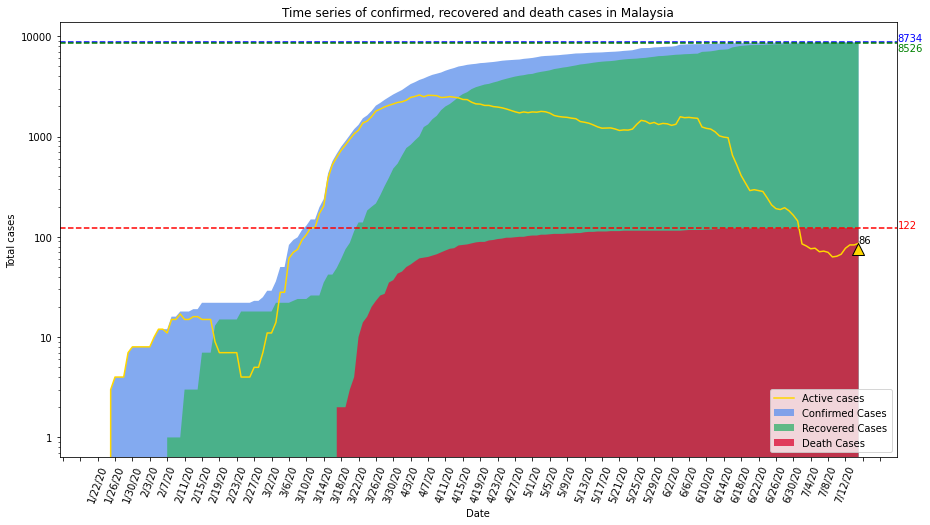

In [ ]:
# Plot chart of cases in Malaysia
plt.figure(figsize=(15,8))

plt.fill_between(dates, my_confirmed, facecolor='cornflowerBlue', alpha=0.8, label='Confirmed Cases')
plt.fill_between(dates, my_recovered, facecolor='mediumSeaGreen', alpha=0.8, label='Recovered Cases')
plt.fill_between(dates, my_death, facecolor='crimson', alpha=0.8, label='Death Cases')
plt.plot(dates, my_active, color='gold', label='Active cases')

plt.axhline(y=my_confirmed[-1], color='blue', linestyle='--')
plt.axhline(y=my_recovered[-1], color='green', linestyle='--')
plt.axhline(y=my_death[-1], color='red', linestyle='--')
plt.text(int(len(dates)*1.05), my_confirmed[-1]*1.1, my_confirmed[-1], color='blue', va='center')
plt.text(int(len(dates)*1.05), my_recovered[-1]*0.9, my_recovered[-1], color='green', va='center')
plt.text(int(len(dates)*1.05), my_death[-1], my_death[-1], color='red')
plt.annotate(s=my_active[-1], xy=(dates[-1], my_active[-1]), arrowprops=dict(facecolor='gold', shrink=0.05))

plt.yscale('log')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xticks(rotation=70)
plt.title('Time series of confirmed, recovered and death cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.legend()

## Prediction

### Predictive Model for Malaysia cases

In [ ]:
def gru_model(sequence_length):
  keras.backend.clear_session()

  in_data = keras.Input((sequence_length, 1),dtype='float32')

  X = keras.layers.GRU(256, return_sequences=True)(in_data)
  # X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.GRU(128, return_sequences=True)(X)
  # X = keras.layers.Flatten()(X)
  # X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.GRU(64)(X)
  # X = keras.layers.Dropout(0.2)(X)
  X = keras.layers.Dense(128, activation='relu')(X)
  X = keras.layers.Dense(64, activation='relu')(X)
  X = keras.layers.Dense(1, activation='relu')(X)

  model = keras.models.Model(inputs=in_data, outputs=X)
  print(model.summary())
  return model

def ffnn_model():
  keras.backend.clear_session()

  in_data = keras.Input((1),dtype='float32')

  X = keras.layers.Dense(256, activation='tanh')(in_data)
  X = keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.3))(X)
  X = keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1))(X)
  X = keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.1))(X)
  X = keras.layers.Dense(1, activation='relu')(X)

  model = keras.models.Model(inputs=in_data, outputs=X)
  print(model.summary())
  return model

def create_rnn_databunch(data, sequence_length):
  sample = np.pad(data, (sequence_length,0), 'constant', constant_values=0).reshape(data.shape[0]+sequence_length, 1)
  sample = [sample[i:i+sequence_length]for i in range(0, len(sample)-sequence_length,1)]
  sample = np.array(sample).reshape(len(sample),sequence_length,1).astype(float)
  
  # features = np.concatenate((sample_confirmed, sample_recovered, sample_death), axis=2)

  # Create label
  label = np.array(data).reshape(len(data),1).astype(float)
  # label = np.concatenate((label_confirmed, label_recovered, label_death), axis=1)

  # X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1)
  # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  return sample, label

def create_ffnn_databunch(data, use_log = False):
  sample = np.arange(1, len(data)+1)
  if use_log:
    label = np.array([np.log(d) if d!=0 else d for d in data ])
  else:
    label = data

  return sample, label

def ffnn_do_forecast(model, train_dates, forecast_days, use_log = False):
  pred_val = model.predict(np.arange(1, len(X_train)+forecast_days+1))
  pred_val = np.exp(pred_val) if use_log else pred_val
  pred_date = train_dates
  for i in range(forecast_days):
    pred_date = pred_date + [(datetime.strptime(pred_date[-1], '%x') + timedelta(days=1)).strftime("%x")]
  return pred_date, pred_val

def gru_do_forecast(model, train_dates, features, forecast_days):
  pred_val = model.predict(features)
  pred_date = train_dates
  pred_feature = features[-1:]
  for i in range(forecast_days):
    pred = model.predict(pred_feature)
    pred_val = np.concatenate((pred_val, pred), axis=0)
    pred_date = pred_date + [(datetime.strptime(pred_date[-1], '%x') + timedelta(days=1)).strftime("%x")]
    pred_feature = np.concatenate((pred_feature[:,1:,:], pred.reshape((1,1,1))),axis=1) 
  return pred_date, pred_val

#### Confirmed cases model

###### Feed forward neural network

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 45,889
Trainable params: 45,889
Non-trainable params: 0
_________________________________________________________

Epoch 200 -> loss: [1.5925194025039673] val_loss: [2.5276072025299072]
Epoch 400 -> loss: [0.023607071489095688] val_loss: [0.03419296443462372]
Epoch 600 -> loss: [0.009959076531231403] val_loss: [0.01762893609702587]
Epoch 800 -> loss: [0.004214084707200527] val_loss: [0.011624934151768684]
Epoch 1000 -> loss: [0.008011028170585632] val_loss: [0.015543444082140923]
Epoch 1200 -> loss: [0.0031281744595617056] val_loss: [0.01364808063954115]
Epoch 1400 -> loss: [0.09296723455190659] val_loss: [0.014933783560991287]
Epoch 1600 -> loss: [0.003054494969546795] val_loss: [0.008945639245212078]
Epoch 1800 -> loss: [0.002048186492174864] val_loss: [0.008554968051612377]
Epoch 2000 -> loss: [0.0034144199453294277] val_loss: [0.007956198416650295]



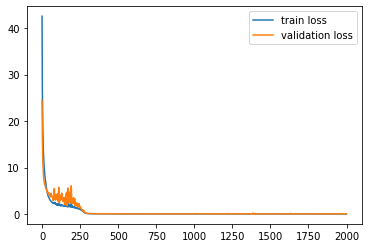

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
model_confirmed = ffnn_model() 

model_hist_confirmed = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_ffnn_databunch(my_confirmed, use_log=use_log)
shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
model_confirmed.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

for i in tqdm(range(epochs)):
  history = model_confirmed.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_hist_confirmed['loss'].append(history.history['loss'])
  model_hist_confirmed['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.plot(model_hist_confirmed['loss'], label='train loss')
plt.plot(model_hist_confirmed['val_loss'], label='validation loss')
plt.legend()

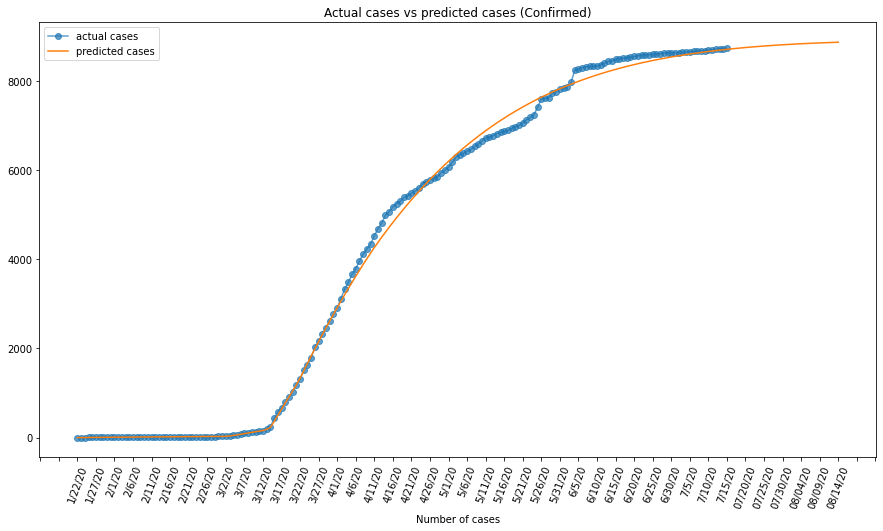

In [ ]:
# Predict

pred_dates, pred_val = ffnn_do_forecast(model_confirmed, dates, 30, use_log=use_log)
plt.figure(figsize=(15,8))
plt.plot(dates, my_confirmed, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Confirmed)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_confirmed.save(f'{WORKING_DIR}/saved_model/model_confirmed')

##### GRU 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 14, 256)           198912    
_________________________________________________________________
gru_1 (GRU)                  (None, 14, 128)           148224    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65    

Epoch 200 -> loss: [0.6173380613327026] val_loss: [0.5348178148269653]
Epoch 400 -> loss: [0.08842206746339798] val_loss: [0.06686374545097351]
Epoch 600 -> loss: [0.03654710575938225] val_loss: [0.028374532237648964]
Epoch 800 -> loss: [0.014826740138232708] val_loss: [0.013980663381516933]
Epoch 1000 -> loss: [0.013423657044768333] val_loss: [0.00949638057500124]
Epoch 1200 -> loss: [0.011940589174628258] val_loss: [0.010028122924268246]
Epoch 1400 -> loss: [0.012058879248797894] val_loss: [0.010159177705645561]
Epoch 1600 -> loss: [0.012143611907958984] val_loss: [0.011319735087454319]
Epoch 1800 -> loss: [0.011694176122546196] val_loss: [0.01103922538459301]
Epoch 2000 -> loss: [0.012003349140286446] val_loss: [0.0062904865480959415]



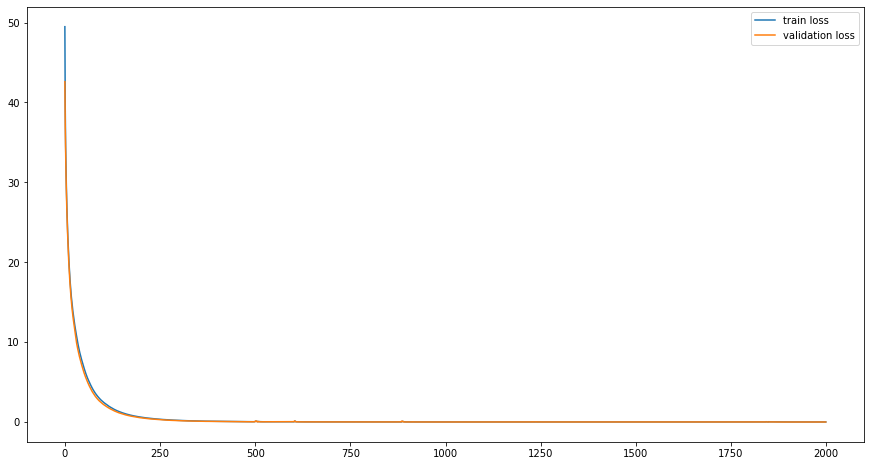

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
sequence_length = 14
model_gru_confirmed = gru_model(sequence_length=sequence_length) 

model_gru_hist_confirmed = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_rnn_databunch(my_confirmed, sequence_length)
model_gru_confirmed.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
for i in tqdm(range(epochs)):
  history = model_gru_confirmed.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_gru_hist_confirmed['loss'].append(history.history['loss'])
  model_gru_hist_confirmed['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.figure(figsize=(15,8))
plt.plot(model_gru_hist_confirmed['loss'], label='train loss')
plt.plot(model_gru_hist_confirmed['val_loss'], label='validation loss')
plt.legend()

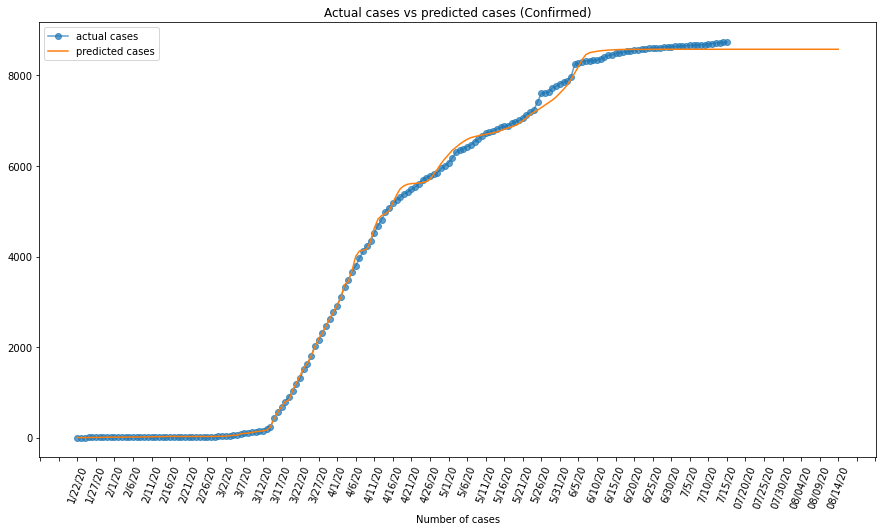

In [ ]:
# Predict

pred_dates, pred_val = gru_do_forecast(model_gru_confirmed, dates, X_train, 30)

plt.figure(figsize=(15,8))
plt.plot(dates, my_confirmed, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Confirmed)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_gru_confirmed.save(f'{WORKING_DIR}/saved_model/model_confirmed')

#### Recovered cases model

##### Feed forward neural network

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 45,889
Trainable params: 45,889
Non-trainable params: 0
_________________________________________________________

Epoch 200 -> loss: [0.19998271763324738] val_loss: [0.202999085187912]
Epoch 400 -> loss: [0.02532576024532318] val_loss: [0.07312078028917313]
Epoch 600 -> loss: [0.016871117055416107] val_loss: [0.029794087633490562]
Epoch 800 -> loss: [0.020889362320303917] val_loss: [0.03196870535612106]
Epoch 1000 -> loss: [0.00964220892637968] val_loss: [0.047047365456819534]
Epoch 1200 -> loss: [0.012119601480662823] val_loss: [0.02854171022772789]
Epoch 1400 -> loss: [0.012635624036192894] val_loss: [0.08454937487840652]
Epoch 1600 -> loss: [0.015583167783915997] val_loss: [0.06216341257095337]
Epoch 1800 -> loss: [0.015664460137486458] val_loss: [0.013765067793428898]
Epoch 2000 -> loss: [0.010226743295788765] val_loss: [0.04249430447816849]



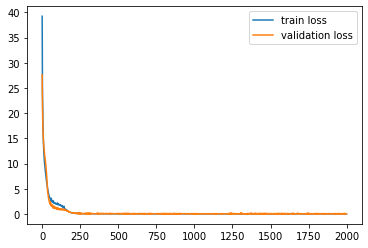

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
model_recovered = ffnn_model() 

model_hist_recovered = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_ffnn_databunch(my_recovered, use_log=use_log)
shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
model_recovered.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

for i in tqdm(range(epochs)):
  history = model_recovered.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_hist_recovered['loss'].append(history.history['loss'])
  model_hist_recovered['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.plot(model_hist_recovered['loss'], label='train loss')
plt.plot(model_hist_recovered['val_loss'], label='validation loss')
plt.legend()

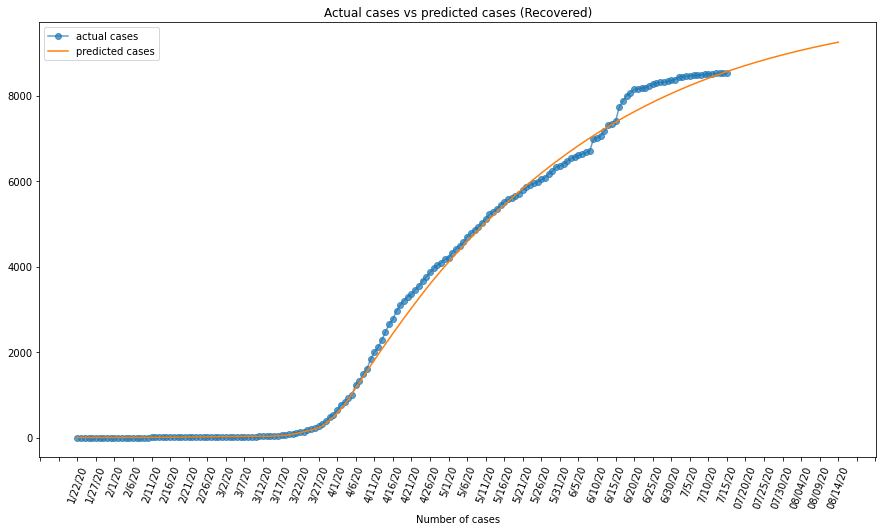

In [ ]:
# Predict

pred_dates, pred_val = ffnn_do_forecast(model_recovered, dates, 30, use_log=use_log)
plt.figure(figsize=(15,8))
plt.plot(dates, my_recovered, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Recovered)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_recovered.save(f'{WORKING_DIR}/saved_model/model_recovered')

##### GRU

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 14, 256)           198912    
_________________________________________________________________
gru_1 (GRU)                  (None, 14, 128)           148224    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65    

Epoch 200 -> loss: [0.6708001494407654] val_loss: [0.5272992849349976]
Epoch 400 -> loss: [0.12038909643888474] val_loss: [0.08247733116149902]
Epoch 600 -> loss: [0.04398169368505478] val_loss: [0.12292538583278656]
Epoch 800 -> loss: [0.012685713358223438] val_loss: [0.06639364361763]
Epoch 1000 -> loss: [0.005929597187787294] val_loss: [0.04493461549282074]
Epoch 1200 -> loss: [0.004019996151328087] val_loss: [0.04553023353219032]
Epoch 1400 -> loss: [0.0036969813518226147] val_loss: [0.037513017654418945]
Epoch 1600 -> loss: [0.0033284721430391073] val_loss: [0.040443599224090576]
Epoch 1800 -> loss: [0.003989902790635824] val_loss: [0.06615941971540451]
Epoch 2000 -> loss: [0.011751593090593815] val_loss: [0.2211380898952484]



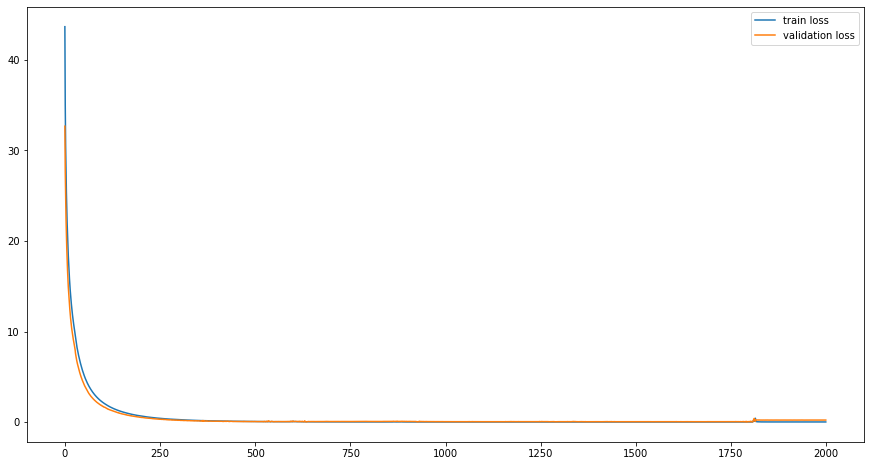

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
sequence_length = 14
model_gru_recovered = gru_model(sequence_length=sequence_length) 

model_gru_hist_recovered = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_rnn_databunch(my_recovered, sequence_length)
model_gru_recovered.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
for i in tqdm(range(epochs)):
  history = model_gru_recovered.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_gru_hist_recovered['loss'].append(history.history['loss'])
  model_gru_hist_recovered['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.figure(figsize=(15,8))
plt.plot(model_gru_hist_recovered['loss'], label='train loss')
plt.plot(model_gru_hist_recovered['val_loss'], label='validation loss')
plt.legend()

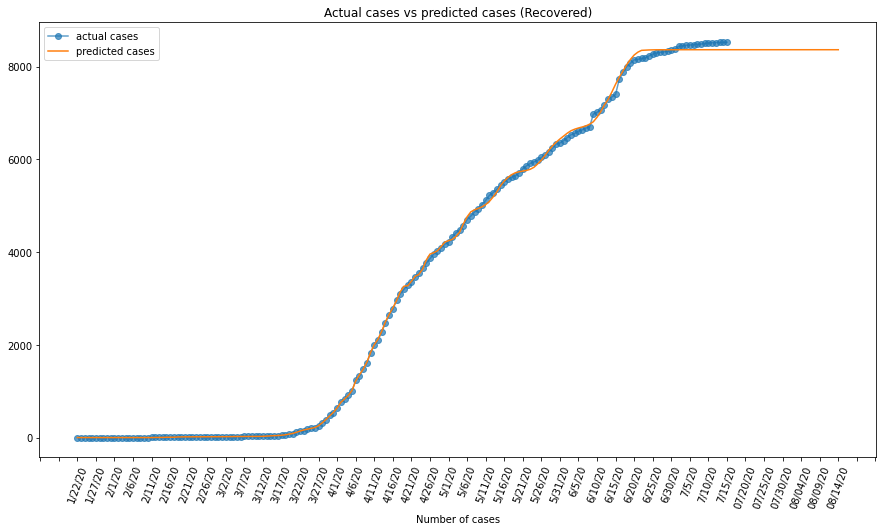

In [ ]:
# Predict

pred_dates, pred_val = gru_do_forecast(model_gru_recovered, dates, X_train, 30)

plt.figure(figsize=(15,8))
plt.plot(dates, my_recovered, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Recovered)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_gru_recovered.save(f'{WORKING_DIR}/saved_model/model_gru_recovered')

#### Death cases model

##### Feed forward neural network

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 45,889
Trainable params: 45,889
Non-trainable params: 0
_________________________________________________________

Epoch 200 -> loss: [0.12819278240203857] val_loss: [0.010763007216155529]
Epoch 400 -> loss: [0.01898319087922573] val_loss: [0.0004683823499362916]
Epoch 600 -> loss: [0.134535551071167] val_loss: [0.002270188182592392]
Epoch 800 -> loss: [0.032755784690380096] val_loss: [0.04603441059589386]
Epoch 1000 -> loss: [0.01217085774987936] val_loss: [0.0028771101497113705]
Epoch 1200 -> loss: [0.0055307140573859215] val_loss: [0.00021919055143371224]
Epoch 1400 -> loss: [0.005702596623450518] val_loss: [0.00368043826892972]
Epoch 1600 -> loss: [0.006068291142582893] val_loss: [0.03221149370074272]
Epoch 1800 -> loss: [0.02269294299185276] val_loss: [0.034050095826387405]
Epoch 2000 -> loss: [0.0018210939597338438] val_loss: [0.011889913119375706]



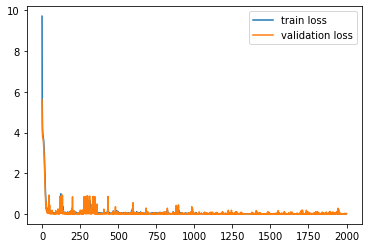

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
model_death = ffnn_model() 

model_hist_death = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_ffnn_databunch(my_death, use_log=use_log)
shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
model_death.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

for i in tqdm(range(epochs)):
  history = model_death.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_hist_death['loss'].append(history.history['loss'])
  model_hist_death['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.plot(model_hist_death['loss'], label='train loss')
plt.plot(model_hist_death['val_loss'], label='validation loss')
plt.legend()

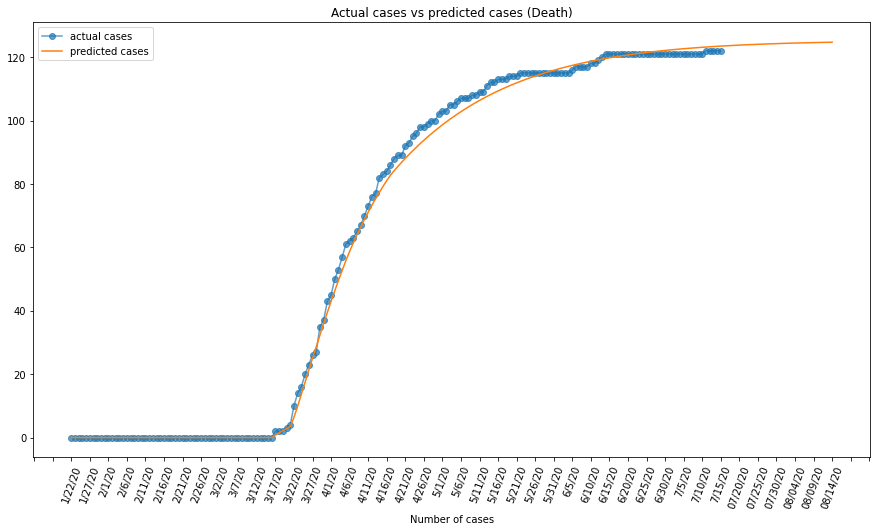

In [ ]:
# Predict

pred_dates, pred_val = ffnn_do_forecast(model_death, dates, 30, use_log=use_log)
plt.figure(figsize=(15,8))
plt.plot(dates, my_death, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Death)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_death.save(f'{WORKING_DIR}/saved_model/model_death')

##### GRU

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 14, 256)           198912    
_________________________________________________________________
gru_1 (GRU)                  (None, 14, 128)           148224    
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65    

Epoch 200 -> loss: [0.007383737247437239] val_loss: [0.13562935590744019]
Epoch 400 -> loss: [0.007317440118640661] val_loss: [0.13548853993415833]
Epoch 600 -> loss: [0.007296756841242313] val_loss: [0.1357223093509674]
Epoch 800 -> loss: [0.0073020015843212605] val_loss: [0.13588601350784302]
Epoch 1000 -> loss: [0.007291330490261316] val_loss: [0.13575270771980286]
Epoch 1200 -> loss: [0.007270685397088528] val_loss: [0.06853049248456955]
Epoch 1400 -> loss: [0.007311957888305187] val_loss: [0.06254273653030396]
Epoch 1600 -> loss: [0.007256218697875738] val_loss: [0.05802907049655914]
Epoch 1800 -> loss: [0.007541371043771505] val_loss: [0.13456305861473083]
Epoch 2000 -> loss: [0.007257260847836733] val_loss: [0.13596732914447784]



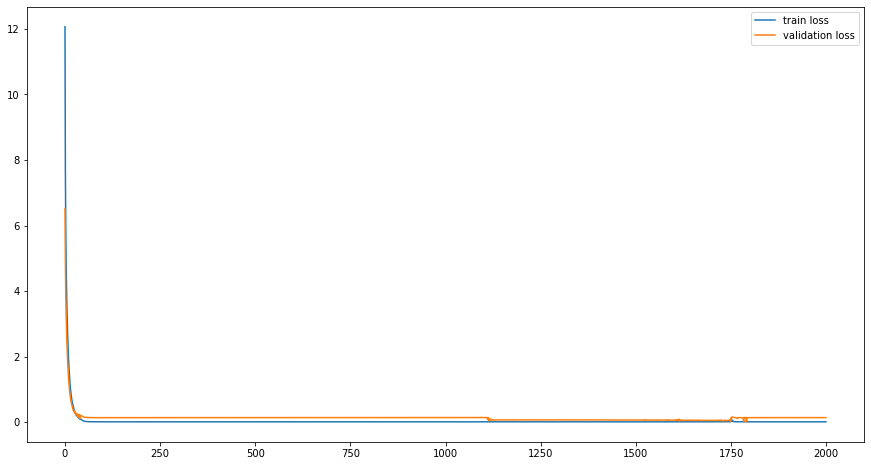

In [ ]:
# Model Training

epochs = 2000
batch_size = 64
use_log = False
sequence_length = 14
model_gru_death = gru_model(sequence_length=sequence_length) 

model_gru_hist_death = {
    'loss': [],
    'val_loss': []
}
X_train, y_train = create_rnn_databunch(my_death, sequence_length)
model_gru_death.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredLogarithmicError())

shuffled_X_train, shuffled_y_train = shuffle(X_train, y_train)
for i in tqdm(range(epochs)):
  history = model_gru_death.fit(x=shuffled_X_train, y=shuffled_y_train, 
                      epochs=1, 
                      batch_size=batch_size, 
                      validation_split=0.05,
                      shuffle=True,
                      verbose=0)
  model_gru_hist_death['loss'].append(history.history['loss'])
  model_gru_hist_death['val_loss'].append(history.history['val_loss'])
  if((int((i+1)%(epochs/10)) == 0) or (i == (epochs-1))):
    print(f"Epoch {i+1} -> loss: {history.history['loss']} val_loss: {history.history['val_loss']}")

# Plot model traning loss
plt.figure(figsize=(15,8))
plt.plot(model_gru_hist_death['loss'], label='train loss')
plt.plot(model_gru_hist_death['val_loss'], label='validation loss')
plt.legend()

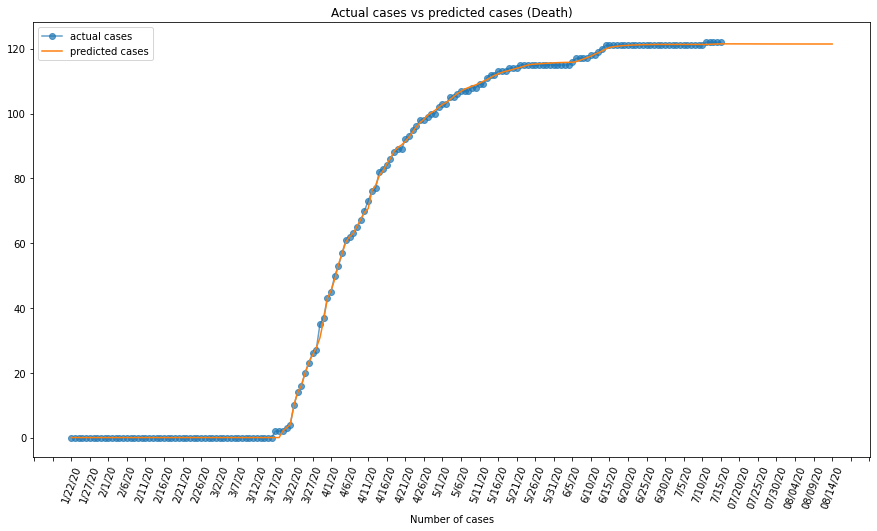

In [ ]:
# Predict

pred_dates, pred_val = gru_do_forecast(model_gru_death, dates, X_train, 30)

plt.figure(figsize=(15,8))
plt.plot(dates, my_death, marker='o', label='actual cases', alpha=0.7)
plt.plot(pred_dates, pred_val, label='predicted cases')
plt.title("Actual cases vs predicted cases (Death)")
plt.xlabel('Date')
plt.xlabel('Number of cases')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.xticks(rotation=70)
plt.legend()

In [ ]:
# model_gru_death.save(f'{WORKING_DIR}/saved_model/model_gru_death')